#*Cardiac Arrhythmia Multi-Class Classification*
#Predict Heart Arrhythmia.

**Tasks:**

1) Data reading, Analyze and Visualization.

2) Address missing data if there is any.

3) Outliers Detection if there is any.

4) Features Selection using PCA.

5) Correctly classify different types of cardiac arrhythmia using following models and compare which one is good for this problem.
  
i)   KNN classifcation \\
ii)  Logistic Regression \\
iii) Linear Support Vector Machine \\
iv) Kernelized Support Vector Machine \\
v) Decision Tree



#Importing important libreries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from matplotlib import pyplot as plt

#1. Data Reading
Starting with reading the data file.

In [2]:
data = pd.read_csv('/content/data_arrhythmia.csv', sep=';')
data=pd.DataFrame(data)
data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


#Arrhythmia Data Visualization

In [3]:
data['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

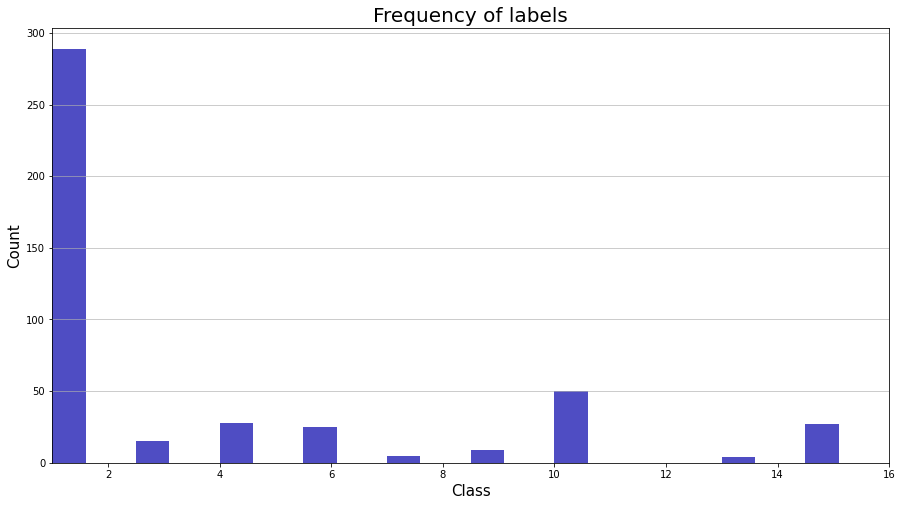

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,8])

plt.hist(data['diagnosis'], width = 0.6, color='#0502aa',alpha=0.7)
plt.xlim(min(data['diagnosis']), max(data['diagnosis']))
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count',fontsize=15)
plt.title('Frequency of labels',fontsize=20)
plt.show()

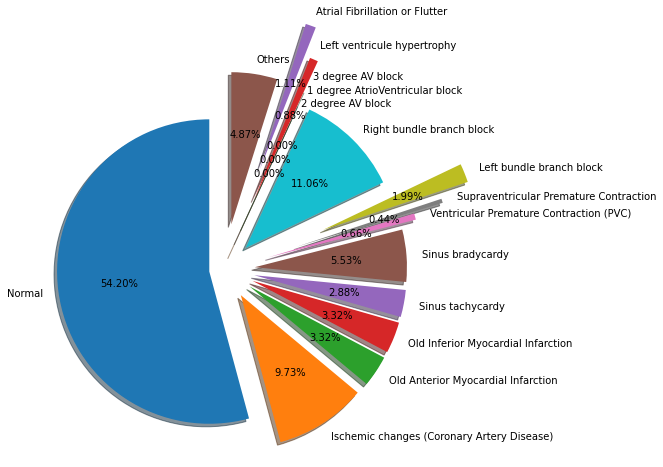

In [5]:
class_name = ['Normal', 'Ischemic changes (Coronary Artery Disease)', 'Old Anterior Myocardial Infarction', 'Old Inferior Myocardial Infarction',
              'Sinus tachycardy', 'Sinus bradycardy', 'Ventricular Premature Contraction (PVC)', 'Supraventricular Premature Contraction',
              'Left bundle branch block', 'Right bundle branch block', '1 degree AtrioVentricular block', '2 degree AV block', '3 degree AV block',
              'Left ventricule hypertrophy', 'Atrial Fibrillation or Flutter', 'Others' ]
value = [245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(value, labels = class_name, startangle=90, shadow=True, explode=(0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.5, 0.7
                                                                        , 0.2, 0.2, 0.1, 0.3, 0.5, 0.7, 0.3), autopct='%1.2f%%')
  
# show plot
plt.show()

Here we can see, 54.20% data of Normal. Means Normal condition has more influence on dataset. 

#Statistical summary

In [6]:
data.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,AY,AZ,AB',BB,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,20.327434,2.300885,0.318584,30.513274,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,25.365424,9.212818,3.124229,18.359850,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,16.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9.100000,0.000000,0.000000,0.4


We can see that original data has 280 columns but we get statistical summary for ony 275 colums. Which means there are 5 columns having missing values.

#2. Detecting columns which has missing values.

In [7]:
data.columns[data.isnull().any()]

Index([], dtype='object')

#Handling the missing value
While going through the dataset we observed that out of 279 columns 5 columns have missing value in the form of '?'. The approach which we will following is, first replacing '?' with numpy NAN and then imputing the mean.


In [8]:
data['J'] = data['J'].replace('?',np.NaN)
data['heart_rate'] = data['heart_rate'].replace('?',np.NaN)
data['P'] = data['P'].replace('?',np.NaN)
data['T'] = data['T'].replace('?',np.NaN)
data['QRST'] = data['QRST'].replace('?',np.NaN)

In [9]:
print( 'Total missing values in J colums:',data['J'].isna().sum(), ', & percentage =',((data['J'].isna().sum())/len(data))*100, '%\n')
print( 'Total missing values in T colums:',data['T'].isna().sum(), ', & percentage =',((data['T'].isna().sum())/len(data))*100,'%\n')
print( 'Total missing values in P colums:',data['P'].isna().sum(), ', & percentage =',((data['P'].isna().sum())/len(data))*100,'%\n')
print( 'Total missing values in QRST colums:',data['QRST'].isna().sum(), ', & percentage =',((data['QRST'].isna().sum())/len(data))*100,'%\n')
print( 'Total missing values in heart rate colums:',data['heart_rate'].isna().sum(), ', & percentage =',((data['heart_rate'].isna().sum())/len(data))*100,'%\n')

Total missing values in J colums: 376 , & percentage = 83.1858407079646 %

Total missing values in T colums: 8 , & percentage = 1.7699115044247788 %

Total missing values in P colums: 22 , & percentage = 4.867256637168142 %

Total missing values in QRST colums: 1 , & percentage = 0.22123893805309736 %

Total missing values in heart rate colums: 1 , & percentage = 0.22123893805309736 %



#Drop column
We can observe that column 'J' have a lot of missing value. It will not be a good practice to impute mean values in this column. Better option will be that we drop this column.


In [10]:
new_data = data.drop(columns=['J'])
new_data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,24,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,76,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,28,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,60,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


#3 Outliers detection
We don't have much knowlege about possible ranges for all variables but for variables 'age', 'height', 'weight' we can decide which are the outliers by common sense.

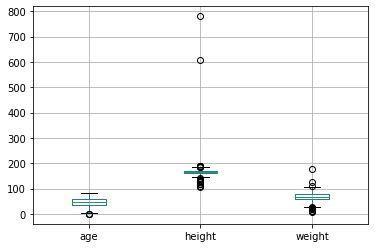

In [11]:
boxplot = new_data.boxplot(column=['age', 'height', 'weight'])


1)for variable 'height' 2 observation more than 600	centimetres which does not seem realistic and hence we will substitute them with mean of remaining observations.


2)for variable 'weight' 1 observation around 180 kilograms seems to be realistic but for accuracy point of view, we will substitute it with mean of remaining observations.

In [12]:
new_data['height'] = np.where(new_data.height > 200, np.nan, new_data.height )
new_data['weight'] = np.where(new_data.weight > 150, np.nan, new_data.weight )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


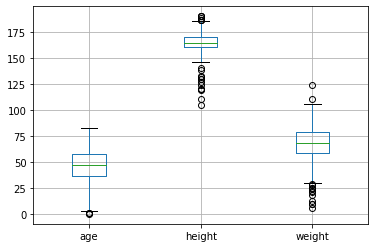

In [13]:
boxplot = new_data.boxplot(column=['age', 'height', 'weight'])

#Spliting the dataset
Segregating the whole dataset into X and Y



In [14]:
Data_Y = new_data.iloc[:,-1]
Data_X = new_data.iloc[:,:-1]
np.unique(Data_Y, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16]),
 array([245,  44,  15,  15,  13,  25,   3,   2,   9,  50,   4,   5,  22]))

#Handling missing value
We are imputing mean in place of missing values



In [15]:
from sklearn.impute import SimpleImputer
z = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(Data_X)
Data_X = pd.DataFrame(data=z,columns=Data_X.columns.values)

In [16]:
Data_X.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,...,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,163.842222,67.931264,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.150901,48.913953,36.716186,74.463415,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,...,0.768142,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,10.389082,15.792928,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.342803,28.621694,35.980768,13.855298,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,...,1.444173,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.300000,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,65.000000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,...,0.000000,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9.1

Here we can see statistical summary for 278 columns.(out of 280 columns one is 'Y' which represent type of arrhythmia and one column 'J' is dropped so Data_X has total 278 columns). So the Column's dimension says, no one column have missing value.

#4. PCA
We will be using principal component analysis for data reduction. We have 278 variables which is increasing the complexity of the models. PCA reduces the dimensions of data which makes potentially easier to learn and lesser the chance of overfitting.

Typically, features with a lot of variance tend to contain meaningful information. We want the explained variance to be between 95%-99%.
Here we have selected it to be 97% as it give good results for our problem.



In [17]:
from sklearn.decomposition import PCA

pca = PCA(0.97)
pca.fit(Data_X)
Data_X_PCA = pca.transform(Data_X)
Data_X_PCA.shape


(452, 47)

So dimension is reduced from 278 to 47

#Spliting down into both train and test data set

In [18]:
data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(Data_X_PCA, Data_Y
                                                                        , test_size=0.2, random_state=34)
print('Shape of train {}, shape of test {}'.format(data_train_x.shape, data_test_x.shape))

Shape of train (361, 47), shape of test (91, 47)


#Scaling
As the variables are on different scale it will be helpful if we bring them all on the same scale. Scaling improves the performance of the models



In [19]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler(feature_range= (0,1))
data_train_x = MinMax.fit_transform(data_train_x)
data_test_x = MinMax.transform(data_test_x)

#Creating Dataframe to compare results for different models

In [20]:
output = pd.DataFrame(index=None, columns=['model', 'train_MSE','test_MSE', 'Accuracy(in %)'])

#5. Modeling
After taking care of the data we will be starting with the model creation.



#*i) KNN Classifier*

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
Weights = ['distance', 'uniform']
N_neighbors = [x for x in range(1, 100)]
acc = []
for i in Weights:
  for j in N_neighbors:
    knn = KNeighborsClassifier(n_neighbors=j, weights= i)
    knn.fit(data_train_x, data_train_y)
    pred = knn.predict(data_test_x)
    acc.append(accuracy_score(data_test_y,pred)*100)
max_acc = max(acc)
max_index = acc.index(max_acc)
if max_index < 100:
  print('weights: distance')
  print('n_neighbors:', max_index+1)
  w_knn='distance'
  n_neib=max_index+1
else:
  print('Weights: uniform')
  print('N_neighbors:', max_index-99)
  w_knn='uniform'
  n_neib=max_index-99

weights: distance
n_neighbors: 3


In [22]:
knn = KNeighborsClassifier(n_neighbors=n_neib, weights= w_knn)
knn.fit(data_train_x, data_train_y)
pred = knn.predict(data_test_x)
print('Accuracy:', accuracy_score(data_test_y,pred)*100, '%')

Accuracy: 64.83516483516483 %


In [23]:
print(classification_report(data_test_y,pred))
print('matrix =', confusion_matrix(data_test_y,pred))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        55
           2       0.67      0.40      0.50         5
           3       1.00      0.33      0.50         3
           4       1.00      0.25      0.40         4
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.67      0.17      0.27        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.65        91
   macro avg       0.37      0.26      0.26        91
weighted avg       0.60      0.65      0.57        91

matrix = [[52  1  0  0  0  1  0  0  1  0  0  0]
 [ 3  2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
train_MSE = mean_squared_error(data_train_y, knn.predict(data_train_x) )
test_MSE = mean_squared_error(data_test_y, pred)
accuracy = accuracy_score(data_test_y,pred)*100
output = output.append(pd.Series({'model':'KNN Classifier', 'train_MSE':train_MSE,'test_MSE':test_MSE, 'Accuracy(in %)':accuracy}),ignore_index=True )
output

,model,train_MSE,test_MSE,Accuracy(in %)
0,KNN Classifier,0.0,27.054945,64.835165


#ii) Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc = []
for i in c:
  log = LogisticRegression(C=i)
  log.fit(data_train_x, data_train_y)
  pred = log.predict(data_test_x)
  acc.append(accuracy_score(data_test_y,pred)*100)
max_acc = max(acc)
max_index = acc.index(max_acc)
print('c=', c[max_index])
c_lg=c[max_index]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


c= 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
log = LogisticRegression(C=c_lg)
log.fit(data_train_x, data_train_y)
pred = log.predict(data_test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
print('Accuracy:', accuracy_score(data_test_y,pred)*100, '%')
print(classification_report(data_test_y,pred))
print('matrix =', confusion_matrix(data_test_y,pred))

Accuracy: 69.23076923076923 %
              precision    recall  f1-score   support

           1       0.68      0.98      0.81        55
           2       0.50      0.40      0.44         5
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      0.42      0.59        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.69        91
   macro avg       0.35      0.26      0.28        91
weighted avg       0.62      0.69      0.62        91

matrix = [[54  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
train_MSE = mean_squared_error(data_train_y, log.predict(data_train_x) )
test_MSE = mean_squared_error(data_test_y, pred)
accuracy = accuracy_score(data_test_y,pred)*100
output = output.append(pd.Series({'model':'Logistic Regression', 'train_MSE':train_MSE,'test_MSE':test_MSE, 'Accuracy(in %)':accuracy}),ignore_index=True )
output

,model,train_MSE,test_MSE,Accuracy(in %)
0,KNN Classifier,0.000000,27.054945,64.835165
1,Logistic Regression,21.207756,21.153846,69.230769


#iii) Linear Supprt Vector Machine


In [29]:
from sklearn.svm import LinearSVC
c = [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000]
Max_iter = [100, 1000, 10000, 100000]
acc =[]
for i in Max_iter:
  for j in c:
    linearsvc = LinearSVC(C=j, max_iter= i)
    linearsvc.fit(data_train_x, data_train_y)
    pred = linearsvc.predict(data_test_x)
    acc.append(accuracy_score(data_test_y,pred)*100)
max_acc = max(acc)
max_index = acc.index(max_acc)

if max_index < 9: 
  print('Max_iter=', 100)
  print('c=', c[max_index] )
  mi_lsvc=100
  c_lsvc=c[max_index]
elif max_index < 18:
  print('Max_iter=', 1000)
  print('c=', c[max_index - 9])
  mi_lsvc=1000
  c_lsvc=c[max_index - 9]
elif max_index < 27:
  print('Max_iter=', 10000)
  print('c=', c[max_index - 18])
  mi_lsvc=10000
  c_lsvc=c[max_index - 18]
else:
  print('Max_iter=', 100000)
  print('c=', c[max_index - 27])
  mi_lsvc=100000
  c_lsvc=c[max_index - 27]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Max_iter= 100
c= 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [30]:
linearsvc = LinearSVC(C= c_lsvc, max_iter= mi_lsvc)
linearsvc.fit(data_train_x, data_train_y)
pred = linearsvc.predict(data_test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [31]:
print("Accuracy = ", accuracy_score(data_test_y,pred)*100, '%')
print(classification_report(data_test_y,pred))
print('matrix =', confusion_matrix(data_test_y,pred))

Accuracy =  72.52747252747253 %
              precision    recall  f1-score   support

           1       0.77      0.96      0.85        55
           2       0.50      0.40      0.44         5
           3       1.00      0.67      0.80         3
           4       0.50      0.25      0.33         4
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.64      0.58      0.61        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.73        91
   macro avg       0.33      0.32      0.31        91
weighted avg       0.64      0.73      0.67        91

matrix = [[53  1  0  0  0  0  0  0  1  0  0  0]
 [ 3  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
train_MSE = mean_squared_error(data_train_y, linearsvc.predict(data_train_x) )
test_MSE = mean_squared_error(data_test_y, pred)
accuracy = accuracy_score(data_test_y,pred)*100
output = output.append(pd.Series({'model':'Linear SVM', 'train_MSE':train_MSE,'test_MSE':test_MSE, 'Accuracy(in %)':accuracy}),ignore_index=True )
output

,model,train_MSE,test_MSE,Accuracy(in %)
0,KNN Classifier,0.000000,27.054945,64.835165
1,Logistic Regression,21.207756,21.153846,69.230769
2,Linear SVM,14.149584,18.802198,72.527473


#iv) Kerenilzed Support Vector Machine

In [33]:
from sklearn.svm import SVC
c = [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000]
Gamma = [0.001, 0.01, 0.1, 0.3, 0.4, 0.5, 0.8, 1, 10]
acc =[]
for i in Gamma:
  for j in c:
    svc = SVC(C=j, gamma= i)
    svc.fit(data_train_x, data_train_y)
    pred = svc.predict(data_test_x)
    acc.append(accuracy_score(data_test_y,pred)*100)
max_acc = max(acc)
max_index = acc.index(max_acc)

if max_index < 9: 
  print('Gamma=', 0.001)
  print('c=', c[max_index] )
  g_svc=0.001
  c_svc=c[max_index]
elif max_index < 18:
  print('Gamma=', 0.01)
  print('c=', c[max_index - 9])
  g_svc=0.01
  c_svc=c[max_index - 9]
elif max_index < 27:
  print('Gamma=', 0.1)
  print('c=', c[max_index - 18])
  g_svc=0.1
  c_svc=c[max_index - 18]
elif max_index < 36:
  print('Max_iter=', 0.3)
  print('c=', c[max_index - 27])
  g_svc=0.3
  c_svc=c[max_index - 27]
elif max_index < 45:
  print('Gamma=', 0.4)
  print('c=', c[max_index - 36])
  g_svc=0.4
  c_svc=c[max_index - 36]
elif max_index < 54:
  print('Gamma=', 0.5)
  print('c=', c[max_index - 45])
  g_svc=0.5
  c_svc=c[max_index - 45]
elif max_index < 63:
  print('Max_iter=', 0.8)
  print('c=', c[max_index - 54])
  g_svc=0.8
  c_svc=c[max_index - 54]
elif max_index < 72:
  print('Gamma=', 1)
  print('c=', c[max_index - 63])
  g_svc=1
  c_svc=c[max_index - 63]
else: 
  print('Max_iter=', 10)
  print('c=', c[max_index - 72])
  g_svc=10
  c_svc=c[max_index - 72]


Gamma= 0.4
c= 10


In [34]:
svc = SVC(C=c_svc, gamma=g_svc)
svc.fit(data_train_x, data_train_y)
pred = svc.predict(data_test_x)
matrix = confusion_matrix(data_test_y,pred)
print("Accuracy = ", accuracy_score(data_test_y,pred)*100, '%')
print(classification_report(data_test_y,pred))

Accuracy =  73.62637362637363 %
              precision    recall  f1-score   support

           1       0.74      0.95      0.83        55
           2       0.57      0.80      0.67         5
           3       1.00      1.00      1.00         3
           4       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.75      0.50      0.60        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.74        91
   macro avg       0.42      0.37      0.37        91
weighted avg       0.67      0.74      0.68        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
train_MSE = mean_squared_error(data_train_y, svc.predict(data_train_x) )
test_MSE = mean_squared_error(data_test_y, pred)
accuracy = accuracy_score(data_test_y,pred)*100
output = output.append(pd.Series({'model':'Kernalized SVM','train_MSE':train_MSE,'test_MSE':test_MSE,'Accuracy(in %)':accuracy}),ignore_index=True )
output

,model,train_MSE,test_MSE,Accuracy(in %)
0,KNN Classifier,0.000000,27.054945,64.835165
1,Logistic Regression,21.207756,21.153846,69.230769
2,Linear SVM,14.149584,18.802198,72.527473
3,Kernalized SVM,3.063712,20.791209,73.626374


#v) Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
Max_features =[None,'auto', 'log2']
Max_depth = [5,10,15,20,50]
acc = []
for i in Max_features:
  for j in Max_depth:
    dt = DecisionTreeClassifier(max_depth=j, max_features=i)
    dt.fit(data_train_x, data_train_y)
    pred = dt.predict(data_test_x)
    acc.append(accuracy_score(data_test_y,pred)*100)
max_acc = max(acc)
max_index = acc.index(max_acc)

if max_index < 5:
  print('Max_features: None' )
  print('Max_depth:', Max_depth[max_index])
  m_fedt=None
  m_dedt=Max_depth[max_index]
elif max_index < 10:
  print('Max_features: auto' )
  print('Max_depth:', Max_depth[max_index - 5])
  m_fedt='auto'
  m_dedt=Max_depth[max_index - 5]
else:
  print('Max_features: log2' )
  print('Max_depth:', Max_depth[max_index - 10])
  m_fedt='log2'
  m_dedt=Max_depth[max_index - 10]

Max_features: None
Max_depth: 5


In [37]:
dt = DecisionTreeClassifier(max_depth=m_dedt, max_features=m_fedt)
dt.fit(data_train_x, data_train_y)
pred = dt.predict(data_test_x)
matrix = confusion_matrix(data_test_y,pred)
print("Accuracy = ", accuracy_score(data_test_y,pred)*100, '%')
print(classification_report(data_test_y,pred))

Accuracy =  62.637362637362635 %
              precision    recall  f1-score   support

           1       0.72      0.95      0.82        55
           2       0.22      0.40      0.29         5
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.20      0.08      0.12        12
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.63        91
   macro avg       0.26      0.23      0.23        91
weighted avg       0.52      0.63      0.55        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
train_MSE = mean_squared_error(data_train_y, dt.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y, pred)
accuracy = accuracy_score(data_test_y,pred)*100
output = output.append(pd.Series({'model':'Decision Tree','train_MSE':train_MSE,'test_MSE':test_MSE,'Accuracy(in %)':accuracy}),ignore_index=True )
output

,model,train_MSE,test_MSE,Accuracy(in %)
0,KNN Classifier,0.000000,27.054945,64.835165
1,Logistic Regression,21.207756,21.153846,69.230769
2,Linear SVM,14.149584,18.802198,72.527473
3,Kernalized SVM,3.063712,20.791209,73.626374
4,Decision Tree,18.570637,27.087912,62.637363


#Conclusion
1)If we consider accuracy only then we got that Kernalized Support Vector Machine with C=10 and gamma=0.4 is best model for this classification with accuracy 73.626374%. 


2)But taking overfitting into consideration, comparing train_MSE, test_MSE, and f1-score, we can conclude that Linear Support Vector Machine with c=0.5 and max_iter=100 is best model for this classification with accuracy 72.5274739%, as Kernalized support vector machine is overfitting for this problem.